## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
Duplicatemouse=combined_df.duplicated(subset=['Mouse ID','Timepoint'])
Duplicatemouses=combined_df[Duplicatemouse]
Duplicatemouses

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Allduplicatemouse=combined_df.loc[combined_df.duplicated('Mouse ID')]
Allduplicatemouse
#combined_df.duplicated('Mouse ID')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleandf=combined_df.drop_duplicates(subset=['Mouse ID'])
Cleandf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
Uniquemouse=Cleandf["Mouse ID"].count()
Uniquemouse

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_comdf= combined_df.groupby(['Drug Regimen'])
type(grouped_comdf)
Mean=grouped_comdf["Tumor Volume (mm3)"].mean()
Median=grouped_comdf["Tumor Volume (mm3)"].median()
Variance=grouped_comdf["Tumor Volume (mm3)"].var()
Stddev=grouped_comdf["Tumor Volume (mm3)"].std()
Sem=grouped_comdf["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
SummaryStatistics_df= pd.DataFrame({"Mean": Mean, "Median": Median, "Variance": Variance, "Standard Deviation": Stddev, "SEM": Sem})
SummaryStatistics_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [8]:
# creat a dataframe that count the how many of the data point for each regiem.
Dataregimen= grouped_comdf["Timepoint"].count()
Dataregimen


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

Text(0, 0.5, 'Number of timePoints')

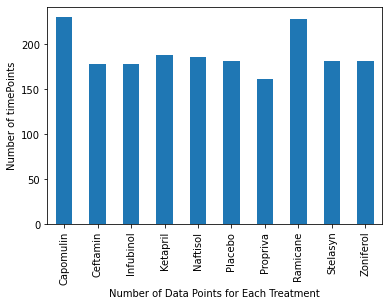

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Dataregimen_chart=Dataregimen.plot(kind="bar")

Dataregimen_chart.set_xlabel('Number of Data Points for Each Treatment')
Dataregimen_chart.set_ylabel("Number of timePoints")

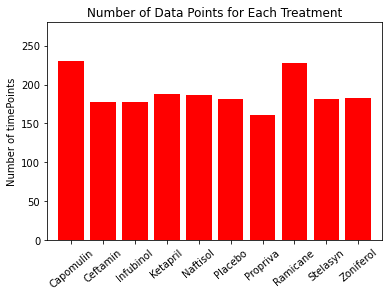

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


Drugeegimen=["Capomulin", "Ceftamin", "Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
Timepoints=Dataregimen.tolist()
Timepoints


x_axis=np.arange(len(Drugeegimen))

plt.bar(Drugeegimen,Timepoints, color="r", align="center")
plt.xticks(x_axis,["Capomulin", "Ceftamin", "Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation=40)


# Set x-label, y-label, and a title:
plt.title('Number of Data Points for Each Treatment')
plt.ylabel("Number of timePoints")

# Set x, y limits:
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Timepoints)+50)

plt.show()


In [14]:
#creat a dataframe that count the distribution of female versus male mice.
groupedgender_comdf= combined_df.groupby(['Sex'])
Datagender= groupedgender_comdf["Mouse ID"].count()
Datagender

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

<AxesSubplot:ylabel='Mouse ID'>

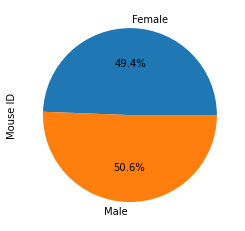

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Datagender.plot(kind="pie",autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x2a3264574c0>,
 [Text(-0.7230187918402546, -0.8290017048509964, 'Female'),
  Text(0.7230187918402547, 0.8290017048509963, 'Male')],
 [Text(-0.39437388645832067, -0.4521827481005435, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

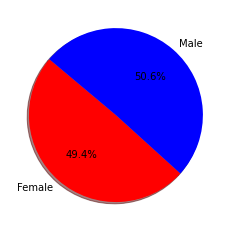

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex=["Female","Male"]
Color=["red","blue"]
plt.pie(Datagender,labels=Sex, colors= Color,autopct="%1.1f%%", shadow=True, startangle=140)



## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Newcombined_df = combined_df[["Drug Regimen", "Mouse ID", "Timepoint","Tumor Volume (mm3)"]]

Finalday=Newcombined_df.sort_values(["Timepoint"], ascending=False)["Timepoint"].max()
Sorted_df=Newcombined_df.loc[Newcombined_df["Timepoint"] == Finalday]
Sorted_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Sorted_df.head()


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
9,Ramicane,k403,45,22.050126
19,Capomulin,s185,45,23.343598
29,Capomulin,x401,45,28.484033
39,Capomulin,m601,45,28.430964
49,Ramicane,g791,45,29.128472


In [66]:
# Put treatments into a list for for loop (and later for plot labels)
 # Locate the rows which contain mice on each drug and get the tumor volumes
capomulintumor_df=sorted_df[sorted_df['Drug Regimen'] == 'Capomulin']

capomulintumor=capomulintumor_df["Tumor Volume (mm3)"]
capomulintumor
capomulin_quartiles = capomulintumor.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
print(f"The lower quartile of the final tumor volumes for Capomulin regimen is: {round(capomulin_lowerq,2)}")
print(f"The upper quartile of the final tumor volumes for Capomulin regimen is: {round(capomulin_upperq,2)}")
print(f"The interquartile range of the final tumor volumes for Capomulin regimen is: {round(capomulin_iqr,2)}")
print(f"The median of the final tumor volumes for Capomulin regimen is: {round(capomulin_quartiles[0.5],2)} ")
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of the final tumor volumes for Capomulin regimen is: 37.69
The upper quartile of the final tumor volumes for Capomulin regimen is: 45.0
The interquartile range of the final tumor volumes for Capomulin regimen is: 7.31
The median of the final tumor volumes for Capomulin regimen is: 41.56 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


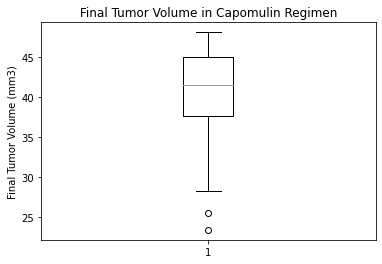

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capomulintumor)
plt.show()

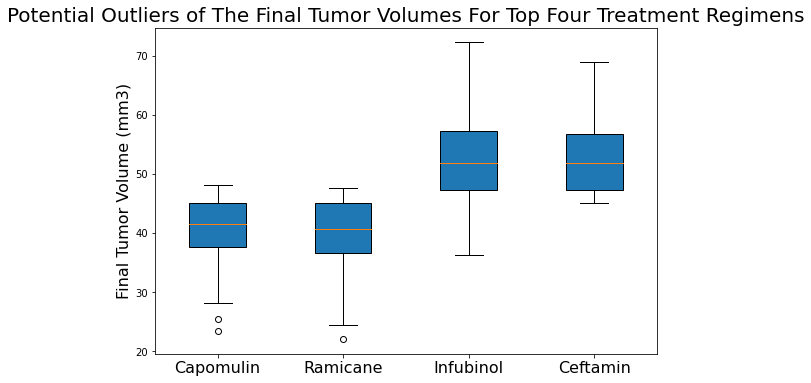

In [70]:
capomulintumor_df=sorted_df[sorted_df['Drug Regimen'] == 'Capomulin']
ramicane_df=sorted_df[sorted_df['Drug Regimen'] == 'Ramicane']
infubinol_df=sorted_df[sorted_df['Drug Regimen'] == 'Infubinol']
ceftamin_df=sorted_df[sorted_df['Drug Regimen'] == 'Ceftamin']
capomulin_tumor=capomulintumor_df['Tumor Volume (mm3)']
ramicane_tumor=ramicane_df['Tumor Volume (mm3)']
infubinol_tumor=infubinol_df['Tumor Volume (mm3)']
ceftamin_tumor=ceftamin_df['Tumor Volume (mm3)']
Finaltumor=[capomulin_tumor,ramicane_tumor,infubinol_tumor,ceftamin_tumor]

fig, ax=plt.subplots(1, figsize=(9, 6))
bp=ax.boxplot(Finaltumor, patch_artist=True)
ax.set_title('Potential Outliers of The Final Tumor Volumes For Top Four Treatment Regimens', fontsize=20)
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=16, color='black')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize=16, color='black')

plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

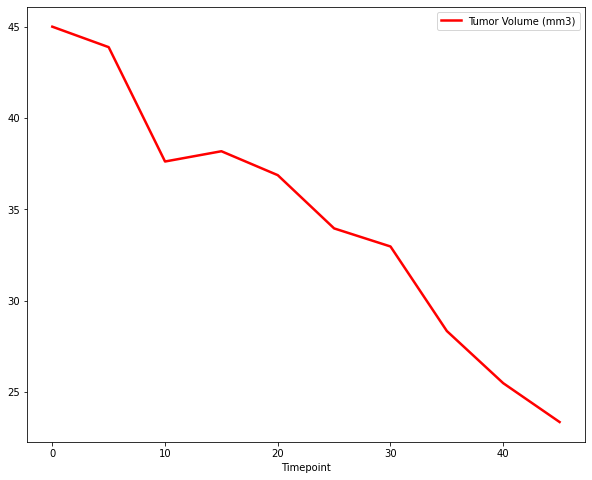

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#create the data series that with time point and tumor volume from previous data frame:
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capo_mouse
# plot the line 

capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capo_mouse
#Now reset the index and generate a line plot showing the tumor volume for mice treated with Capomulin
#capo_mouse = capo_mouse.reset_index(drop=True)
capo_mouse =capo_mouse.set_index("Timepoint")
capo_mouse
capo_mouse.plot(figsize=(10,8), linewidth=2.5, color="red")

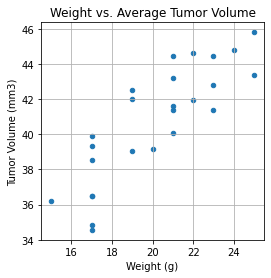

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

# get the average tumor volumn per each mouse.
avg_tumor = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_tumor.head()

#plot the scatter plt
avg_tumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression